<a href="https://colab.research.google.com/github/SerigneSaliouDia/Projet-Machine-Learning/blob/main/Projet_ML_IIA2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet de Machine Learning: Prédiction des maladies cardiovasculaires (Classification)**
<center>
<img src="https://2.bp.blogspot.com/-dk3-0D4j1r0/XKcb1sXWJLI/AAAAAAAAA7Y/486vbMd_PqYoHIb-ofcp0vKGrIXhDkFrwCLcBGAs/s1600/Machine%2BLearning%2Bin%2BHealthcare%2B2.png" width="500"/>
</center>

## **Présenté par:**
* Serigne Saliou Dia
* Diarnou Faye

# **I. Description du projet:**
## **1. Introduction** :
Les maladies cardiovasculaires (MCV) constituent la principale cause de mortalité à l’échelle mondiale, avec environ 17,9 millions de décès chaque année, soit 31 % de l’ensemble des décès dans le monde. Dans 4 cas sur 5, ces décès sont provoqués par des crises cardiaques ou des accidents vasculaires cérébraux, et un tiers d’entre eux surviennent prématurément chez des personnes âgées de moins de 70 ans. L’insuffisance cardiaque, fréquente chez les patients atteints de MCV, est un phénomène récurrent.

## **2. Objectifs :**
L’objectif principal de notre projet est de développer un modèle prédictif capable d’identifier très tôt les individus à risque de développer une maladie cardiovasculaire.
## **3. Resultats attendu :**
À l’issue de ce projet, les résultats attendus sont les suivants :

- Un modèle prédictif fiable capable d’identifier avec une bonne précision les individus susceptibles de développer une maladie cardiovasculaire.

- Une meilleure compréhension des variables les plus influentes dans la prédiction des maladies cardiovasculaires, permettant d’orienter les efforts de prévention.

- Des visualisations claires et pertinentes (diagrammes, courbes ROC, matrices de confusion, etc.) facilitant l’interprétation des résultats par des non-spécialistes.

- Une évaluation comparative des algorithmes de classification, avec des recommandations sur le modèle le plus performant pour ce type de données.

- Une base pour un système d’aide à la décision médicale, pouvant être intégré dans un outil de dépistage précoce ou un tableau de bord de suivi des patients à risque

## **4. Plan :**
  - ## **I. Description du projet :**
  - ## **1. Introduction**
  - ### **2. Objectifs :**
  - ### **3. Resultats attendu :**
  - ### **4. Plan :**
  - ## **II. Description des données :**
  - ### **1. Téléchargement des données :**
  - ### **2. Exploration et prétraitement des données :**

  - ## **III. Traitements des données :**
  - ### **1. Description de l'algorithme :**
  - ### **2. Justification :**
  - ### **3. Alternatives :**

  - ## **IV. Résultats finals**
  - ### **1. Présentation et Analyse des résultats :**
  - ### **2. Performances et Limites :**
  - ### **3. Etudes statistiques des résultats :**

<br>
<br>



# **II. Description des données :**
## **1. Téléchargement des données :**

- **Importation des sources de données :**

In [ ]:
# Importation des sources de données kaggle
import kagglehub
fedesoriano_heart_failure_prediction_path = kagglehub.dataset_download('fedesoriano/heart-failure-prediction')

print('Importation des sources de données réussi.')



Importation des sources de données réussi.


- **Importation des Bibliothèques :**

In [ ]:
# Importation des Bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Bibliothèques de prétraitement
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# Bibliothèques de modèles
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Bibliothéque d'évaluation
from sklearn.model_selection import cross_val_score

# Matrice d'évaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

#Bibliothéque pour tests
import ipywidgets as widgets
from IPython.display import display, clear_output

# Import d'algorithmes alternatifs
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

- **Importation des données :**

In [ ]:
#Importation des données
df=pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## **2. Exploration et prétraitement des données :**
Commençons par examiner le jeu de données pour mieux comprendre sa structure et ses caractéristiques.


In [ ]:
# Affichage des premières lignes du dataset
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


✅ Interprétation :
####`df.head` : Cette fonction retourne les 4 premières lignes de notre jeux de données sur la prédiction de l'insuffisance cardiaque. Elle est utile pour obtenir un aperçu rapide des données et en déduire des observations comme la structure des données, les types de variables (numériques, catégorielles), et identifier des tendances possibles.

### **Dans notre jeux de données on remarque :**
#### **Les colonnes :**
  - **`Age :`** Âge du patient.
  - **`Sex :`** Sexe du patient (M = homme, F = femme).
  - **`ChestPainType :`** Type de douleur thoracique (ATA, NAP, ASY, etc.).
  - **`RestingBP :`** Pression artérielle au repos.
  - **`Cholesterol :`** Taux de cholestérol.
  - **`FastingBS :`** Glycémie à jeun (0 = <120 mg/dl, 1 = >120 mg/dl).
  - **`RestingECG :`** Résultat de l’ECG au repos.
  - **`MaxHR :`** Fréquence cardiaque maximale atteinte.

#### **Points intéressants :**
  - Les patients n'ont **`pas de glycémie à jeun > 120 (tous à 0)`**.
  - La fréquence cardiaque max varie beaucoup **`(de 98 à 172)`**.
  - Les douleurs thoraciques sont de types variés : **`ATA (Angine Typique), NAP (Non Angineuse), ASY (Asymptomatique).`**
  - Une seule personne a un **`ECG de type ST, les autres sont Normal.`**

In [ ]:
# Information sur la structure du dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


✅ Interprétation :

La méthode `.info()` de Pandas nous donne un résumé concis du DataFrame. Elle fournit des informations essentielles sur notre DataFrame, telles que le nombre de lignes qui est de 918 et de colonnes qui est de 12 dqns notre cas, les noms des colonnes (Age, Sex, ChestPainType etc), les types de données de chaque colonne, le nombre de valeurs non nulles (918) et l'utilisation de la mémoire (86.2+ KB).

In [ ]:
# Dimension de notre matrice de donnée
df.shape

(918, 12)

✅ Interprétation :

 On a une matrice de 918 lignes et 12 colonnes

In [ ]:
# Statistiques descriptives
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


✅ Interprétation :
1. **Age (Âge en années) :**
  - **`Moyenne (mean) :`** l'age moyenne des individus de notre jeux de données est de `53,5 ans.`

  - **`Écart-type (std) :`** `9,43` → l’âge varie modérément autour de la moyenne

  - **`Min/Max :`** de `28 à 77 ans`

  - **`Médiane (50%) :`** `54 ans`

  - **`25%-75% (IQR) :`** entre `47 et 60 ans`
  
👉 La majorité des patients sont des adultes d'âge moyen à avancé.

2. **RestingBP (Tension artérielle au repos) :**
Moyenne : 132 mmHg (légèrement élevée par rapport à la norme de 120 mmHg)

  - **`Min :`** `0` → valeur aberrante (non réaliste)

  - **`Max :`** `200 mmHg` → hypertension sévère

👉 Certaines données peuvent être corrompues (ex. : 0), il faudra peut-être les nettoyer.

3. **Cholesterol (Cholestérol total en mg/dL)**
Moyenne : 198,8 mg/dL → dans la limite supérieure de la normale

  - **`Min :`** `0` → encore une fois, valeur probablement incorrecte

  - **`Max :`** `603 mg/dL` → extrêmement élevé

👉 Des outliers et des erreurs possibles ici aussi.

4. **FastingBS (Glycémie à jeun > 120 mg/dL)**
Valeurs : 0 ou 1 (binaire)

  - **`Moyenne :`** `0,233` → environ `23,3%` des patients ont une glycémie à jeun élevée
  
👉 Peut être indicateur de diabète.

5. **MaxHR (Fréquence cardiaque maximale atteinte)**
  - **`Moyenne :`** `136,8 bpm`
  - **`Min/Max :`** de `60 à 202 bpm`

👉 Cela peut refléter la forme physique ou la réponse à un stress/exercice.



In [ ]:
# Vérification des valeurs manquantes
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


✅ Interprétation :
- `Aucune colonne` ne contient de valeurs `nulles (NaN)`.
- Cela signifie que les données que nous avons sont complètes pour toutes les colonnes de notre DataFrame.
- Nous n’avons pas besoin d’imputer, de supprimer ou de traiter des valeurs manquantes pour pouvoir analyser ou modéliser.

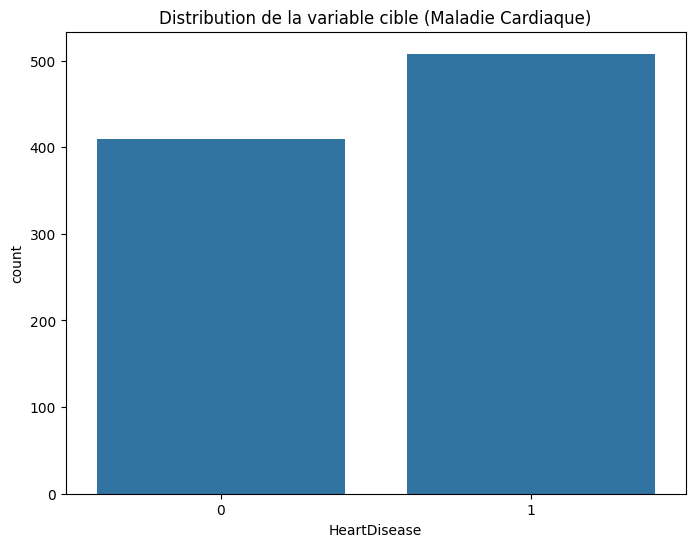

In [ ]:
# Visualisation de la distribution de la variable cible
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution de la variable cible (Maladie Cardiaque)')
plt.show()

##📊 **Ce que ce graphique montre :**

- L'axe x représente les deux classes de la variable HeartDisease :
    - 0 = Pas de maladie cardiaque
    - 1 = Présence de maladie cardiaque

- L'axe y montre le nombre de patients pour chaque classe.


- il y'a environs `500 cas positifs (avec maladie)` et `400 cas négatifs (sans maladie)`.

-  Les classes de notre jeu de données sont `modérément équilibré`.



### **- Difficultés :**

👉 Problème : Bruit (Noise) et Les valeurs aberrantes (Outliers);

👉 Problème : Surapprentissage (Overfitting), biais ou de fuites de données;

👉 Problème : Forte corrélation entre deux ou plusieurs variables;


👉 Problème : Incompatibilité avec les algorithmes, Risque d'interprétation erronée, Biais dû à des classes dominantes;


### **- Discussions :**
Pour résoudre ces difficultés, nous allons:

1.Analyser les corrélations entre les variables :

L’analyse de la corrélation entre deux ou plusieurs variables est une étape essentielle en data science, car elle permet de révéler des relations qui peuvent résoudre ou éviter plusieurs types de problèmes.

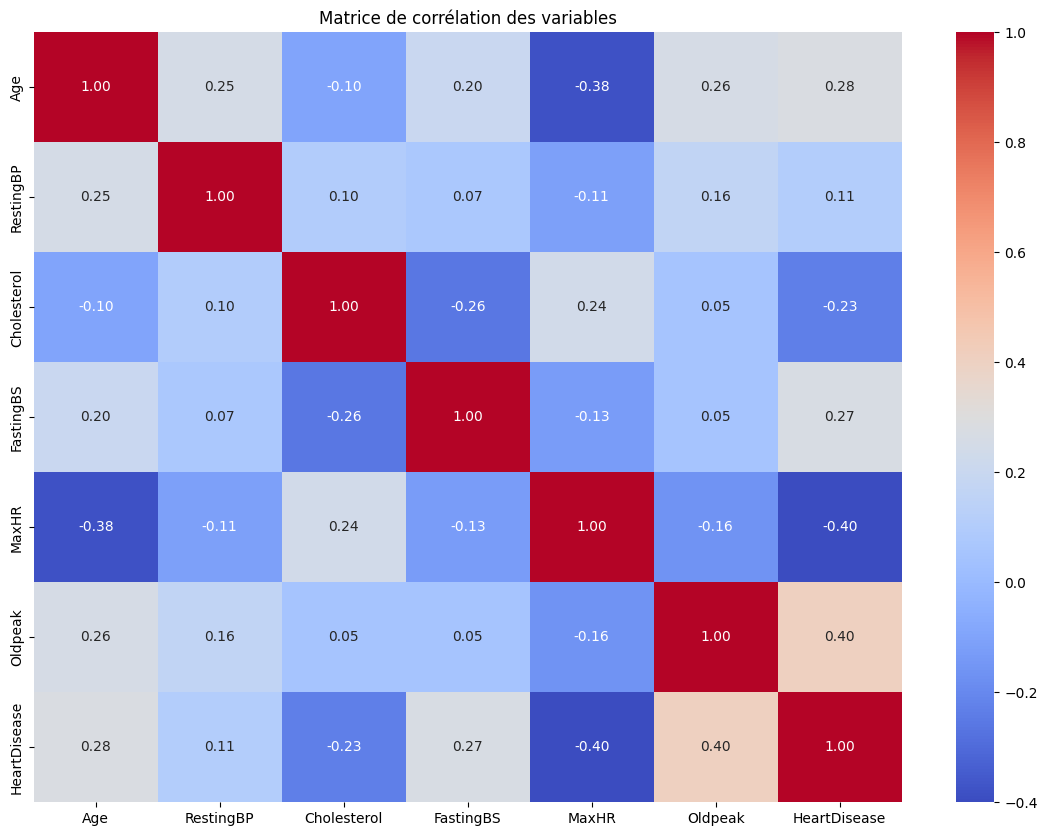

In [ ]:
# Matrice de corrélation
plt.figure(figsize=(14, 10))
donnée_numérique = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = donnée_numérique.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation des variables')
plt.show()

Ici Nos variables explicatives (features) ne sont pas fortement corrélées entre elles, elles ne peuvent donc pas perturber notre modèle, ou rendre les coefficients instables.

 2.Traiter les variables catégorielles :

permet de résoudre plusieurs difficultés dans un pipeline de machine learning ou d'analyse statistique comme : une incompatibilité avec les algorithmes, risque de iqis ou dominance, perte d'informations ou mauvaise modélisation...


In [ ]:
# Encodage des variables catégorielles
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Utilisation de OneHotEncoder pour les variables catégorielles
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Combinaison des variables numériques et encodées
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
X = pd.concat([df[numerical_features].reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
y = df['HeartDisease']

✅ Interprétation :
- On identifies ici les colonnes qui contiennent des valeurs non numériques à encoder.
- `drop='first' :` supprime la première catégorie pour éviter la multicolinéarité (ce qu'on appelle le dummy variable trap).
- `sparse_output=False :` retourne une matrice dense (DataFrame classique) au lieu d’une matrice creuse.
- On transformes tes colonnes en colonnes numériques binaires `(0 ou 1), une par catégorie (moins une)`.
- On nommes clairement chaque colonne encodée, par exemple :
Sex_M, ChestPainType_ATA, ChestPainType_NAP, etc.
- On identifies les variables déjà numériques, on crées la matrice des features finales X prête pour l'entraînement du modèle et extrais la variable cible (0 ou 1) dans y.

3.Détection et traitement des valeurs aberrantes :

 Une valeur aberrante est une valeur anormalement élevée ou basse par rapport au reste des données. elle peut fausser les statistiques, cacher des erreurs de saisie ...

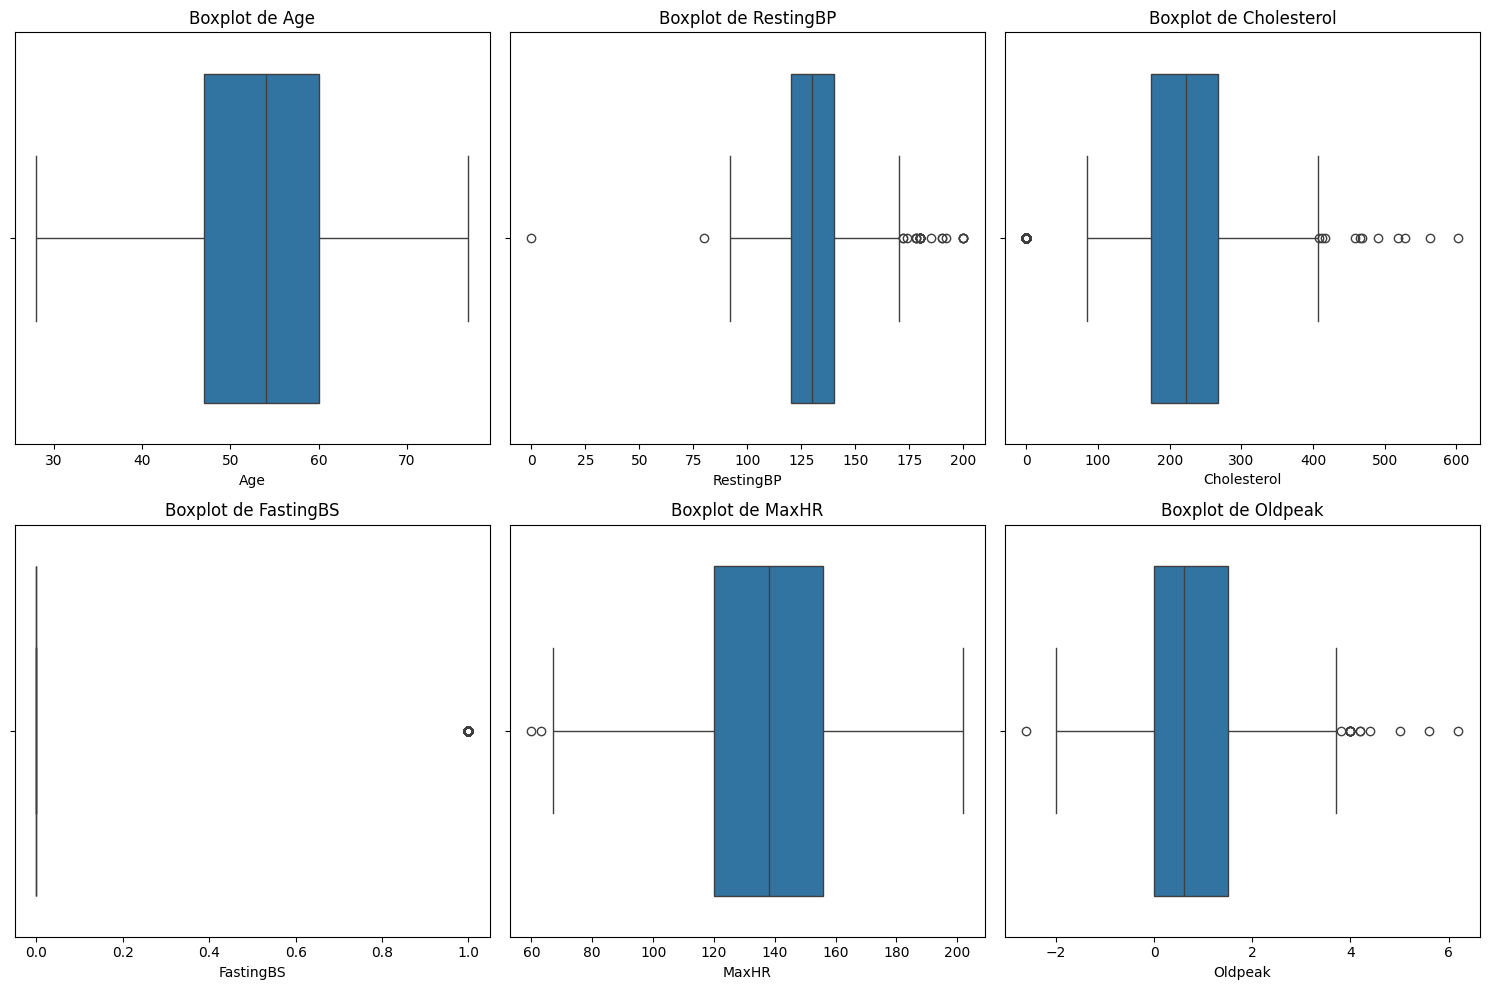

In [ ]:
# Analyse des variables numériques pour détecter les valeurs aberrantes
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot de {feature}')
plt.tight_layout()
plt.show()

# Traitement des valeurs aberrantes
# Pour Cholestérol
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remplacement des valeurs aberrantes par les bornes
df['Cholesterol'] = np.where(df['Cholesterol'] > upper_bound, upper_bound,
                            np.where(df['Cholesterol'] < lower_bound, lower_bound, df['Cholesterol']))

# Pour RestingBP
aberrant_bp = df[df['RestingBP'] == 0]

# Supprimer les lignes aberrantes
df_cleaned = df[(df['RestingBP'] != 0) ]

✅ Impact :
- Meilleure compréhension des anomalies;
- Réduction de l’influence des valeurs extrêmes;
- Nettoyage des erreurs de saisie ou données corrompues.

4.Division des données en ensembles d'entraînement et de test :

In [ ]:
# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Dans notre DataFrame le nombre d'échantillons d'entraînement est de : {X_train.shape[0]}")
print(f"Et le nombre d'échantillons de test sera de : {X_test.shape[0]}")

Dans notre DataFrame le nombre d'échantillons d'entraînement est de : 734
Et le nombre d'échantillons de test sera de : 184


# **III. Traitements des données :**
## **1. Description de l'algorithme :**
Nous allons implémenter plusieurs algorithmes de classification pour prédire les maladies cardiovasculaires :

**Régression Logistique :** Un algorithme linéaire qui estime la probabilité qu'une instance appartienne à une classe particulière.

**Support Vector Machine (SVM) :** Un algorithme qui cherche un hyperplan optimal pour séparer les classes.

**K-Nearest Neighbors (KNN) :** Un algorithme qui classe une instance selon les classes de ses k voisins les plus proches.

In [ ]:
# Implémentation des modèles
models = {
    'Régression Logistique': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}


#Entraînement et évaluation des modèles

In [ ]:
results = {}
for name, model in models.items():
    # Entraînement
    model.fit(X_train, y_train)
    # Prédictions
    y_pred = model.predict(X_test)

    # Évaluation
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)

    # Stockage des résultats
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report
    }

    print(f"Modèle: {name}")
    print(f"Précision: {accuracy:.4f}")
    print("Matrice de confusion:")
    print(conf_matrix)
    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Modèle: Régression Logistique
Précision: 0.8859
Matrice de confusion:
[[68 14]
 [ 7 95]]
Rapport de classification:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

--------------------------------------------------
Modèle: SVM
Précision: 0.7174
Matrice de confusion:
[[57 25]
 [27 75]]
Rapport de classification:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69        82
           1       0.75      0.74      0.74       102

    accuracy                           0.72       184
   macro avg       0.71      0.72      0.71       184
weighted avg       0.72      0.72      0.72       184

--------------------------------------------------
Modèle: KNN
Précision: 0.6957


#✅ Interpretation :
## Modèle de regression Logistique :
- On constate que ce modèle est très bon avec une précision de 89%
- On détecte très bien les vrais cas de maladie `(rappel = 0.93 pour la classe 1)`
- Il fait quelques `faux positifs (14 personnes sans maladie prédites comme malades)`, mais `peu de faux négatifs (7 seulement)`
- `F1-score élevé` pour les deux classes → notre modèle est bien équilibré.

## Modèle de support vector machine (SVM) :
- Le SVM est moins performant ici, `surtout pour la classe malade (1).`
- Il loupe beaucoup plus de malades `(27 vs 7)` → ce qui est risqué en contexte médical.

- Ce modèle peut être amélioré avec du `tuning des paramètres (kernel, C, gamma…)`, mais tel quel est, `il est inférieur à la régression logistique.`

## Modèle de K-Nearest Neighbors (KNN):
On note une `précision global de 0.6957 soit (≈ 70%)`

🔵 Classe 0 `(Pas de maladie)` :
  - Précision : 0.66 → `66% de ceux prédits "sains"` sont vraiment sains
  - Rappel : 0.66 → le modèle `détecte 66% des vrais non-malades`

🔴 Classe 1` (Maladie)` :
    
  - Précision : 0.73 → `73% de ceux prédits "malades"` sont vraiment malades
  - Rappel : 0.73 → le modèle `identifie 73% des vrais malades`

➡️ KNN n’est pas idéal ici, surtout si le coût de rater un malade est élevé (ce qui est le cas en santé 🩺).


## **2. Justification :**
Les algorithmes choisis ont les avantages suivants :

* Régression Logistique : Simple, interprétable et efficace pour les problèmes de classification binaire.
* SVM : Performant dans les espaces à haute dimension et robuste face aux valeurs aberrantes.
* KNN : Non paramétrique, ne fait pas d'hypothèses sur la distribution des données.

Ces algorithmes offrent une diversité d'approches qui permettent de capturer différentes structures dans les données.

## **3. Alternatives :**
D'autres algorithmes comme Random Forest Decision ou Tree pourraient être envisagés pour améliorer les performances.


In [ ]:
# Définition des modèles alternatifs
alternative_models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# Entraînement et évaluation des modèles alternatifs
for name, model in alternative_models.items():
    # Entraînement
    model.fit(X_train, y_train)

    # Prédictions
    y_pred = model.predict(X_test)

    # Évaluation
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Stockage des résultats
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

    print(f"Modèle: {name}")
    print(f"Précision: {accuracy:.4f}")
    print("Matrice de confusion:")
    print(conf_matrix)
    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))

    print("-" * 50)

Modèle: Random Forest
Précision: 0.8750
Matrice de confusion:
[[70 12]
 [11 91]]
Rapport de classification:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        82
           1       0.88      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184

--------------------------------------------------
Modèle: Gradient Boosting
Précision: 0.8750
Matrice de confusion:
[[71 11]
 [12 90]]
Rapport de classification:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        82
           1       0.89      0.88      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184

--------------------------------------------------
Modèle: Decision Tree
Pr

#✅ Interpretation :
## Modèle: Random Forest
Précision globale (accuracy) : `0.8750 → 87,5%` des prédictions sont correctes.

🔵 Classe 0 `(Pas de maladie)` :
  - Précision : `0.86 → parmi ceux prédits “sains”, 86% le sont vraiment`;
  - Rappel : `0.85 → le modèle détecte 85%` des vrais non-malades.

🔴 Classe 1 `(Maladie)` :
  - Précision : `0.88 → 88% des prédictions “malade” sont correctes`;
  - Rappel : `0.89 → 89% des vrais malades sont détectés`;
  - F1-score : `0.89 → excellent équilibre entre précision et rappel.`

Le Random Forest est un modèle robuste et performant, juste un peu moins bon que la régression logistique en termes de rappel `(89% vs 93%).` Mais il reste un excellent choix si on veux un modèle : `stable, résistant au surapprentissage, et capable de gérer des relations complexes entre variables.`

## Modèle: Gradient Boosting
Précision globale `(accuracy) : 0.8750 → 87,5% des prédictions sont correctes`. C’est équivalent en performance globale au Random Forest dans notre cas !

🔵 Classe 0 `(Pas de maladie)` :
  - Précision : `0.86 → parmi ceux prédits “sains”`, `86% sont- vraiment sains;`
  - Rappel : `0.87 → le modèle détecte 87% des vrais non-malades.`

🔴 Classe 1 `(Maladie)` :
  - Précision : `0.89 → parmi les prédits "malades"`, `89% sont corrects;`
  - Rappel : `0.88 → le modèle identifie 88% des malades;`
  - F1-score : `0.89 → excellent équilibre.`

Le modèle Gradient Boosting est très performant, au même niveau que Random Forest. Il gère bien la complexité des données, réduit les erreurs sans surapprentissage. Il est légèrement en dessous de la régression logistique au niveau du rappel `(88% vs 93%)`, mais reste un excellent compromis entre complexité et performance.

## Modèle: Decision Tree

🔵 Classe 0 `(Pas de maladie)`
  - Précision :` 0.78 → parmi ceux prédits "sains"`, `78% le sont vraiment`;
  - Rappel : `0.71 → 71% des vrais sains sont détectés`;
  - F1-score :` 0.74 → correct, mais plus faible que pour la classe 1`.

🔴 Classe 1 `(Maladie)`
  - Précision : `0.78`;
  - Rappel : `0.84 → bon`, il détecte bien les malades;
  - F1-score : `0.81 → meilleur que pour la classe 0`.

Le Decision Tree offre une interprétabilité facile. Il fait moins bien que les modèles d’ensemble (Random Forest et Gradient Boosting), mais mieux que KNN et SVM. Meilleure détection des `malades (84%)` que des `sains (71%)`. C’est un bon modèle de base ou à utiliser pour expliquer les décisions du modèle, même si on en déploies un autre.

## Modèle: Neural Network

`Précision globale (accuracy) : 0.8587 → 85,9% des prédictions` sont correctes. Très bonne performance, proche de Gradient Boosting, Random Forest et Régression Logistique.

🔵 Classe 0 `(Pas de maladie)` :
  - Précision : `0.88 → parmi ceux prédits “sains”`, `88% le sont vraiment`;
  - Rappel : `0.79 → 79% des vrais` sains sont bien identifiés;
  - F1-score : `0.83 → bon équilibre`.

🔴 Classe 1 `(Maladie)` :
  - Précision : `0.85 → 85% des prédits "malades"` sont réellement malades;
  - Rappel : `0.91 → le modèle détecte 91% des malades` ce qui veut dire qu'il est Très bon;
  - F1-score : `0.88 → excellent`.

Le réseau de neurones se classe parmi les meilleurs modèles testés.
Il excelle dans la détection des malades `(91%)`, ce qui est crucial dans un contexte médical.
Un peu moins bon pour détecter les sains `(rappel 79%)`, mais reste globalement équilibré.
Performances proches de la régression logistique, avec un léger désavantage en précision globale, mais un très bon rappel pour les malades.

# **IV. Résultats finals**
## **1. Présentation et Analyse des résultats :**

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Régression Logistique'),
  Text(1, 0, 'SVM'),
  Text(2, 0, 'KNN'),
  Text(3, 0, 'Random Forest'),
  Text(4, 0, 'Gradient Boosting'),
  Text(5, 0, 'Decision Tree'),
  Text(6, 0, 'Neural Network')])

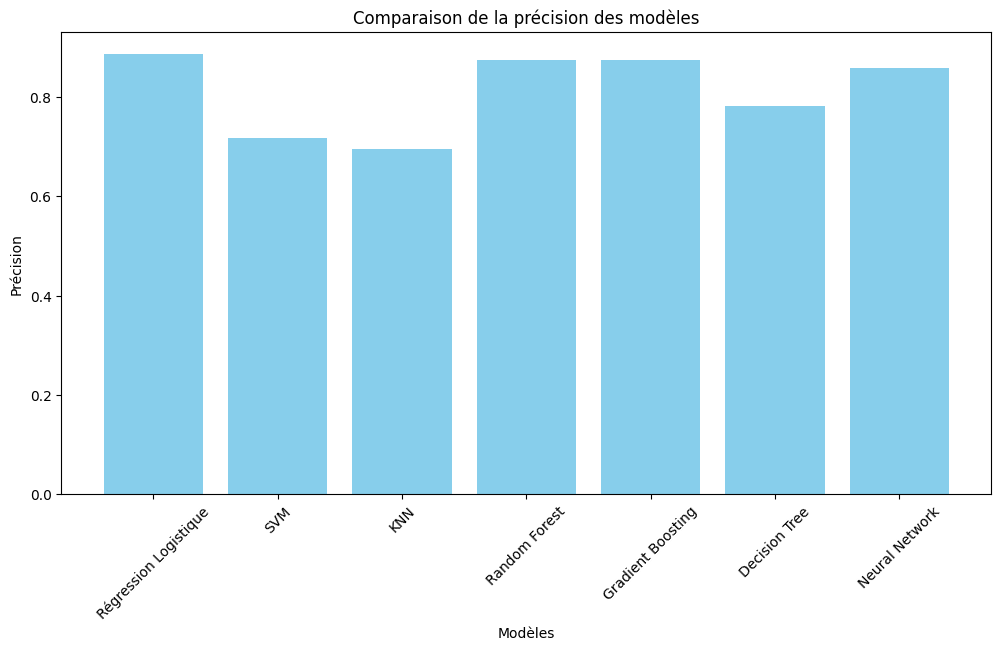

In [ ]:
# Comparaison des performances des modèles
accuracies = [results[model]['accuracy'] for model in results]
model_names = list(results.keys())

plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Modèles')
plt.ylabel('Précision')
plt.title('Comparaison de la précision des modèles')
plt.xticks(rotation=45)


✅ Interpretation :

- On constate que le modèle de `Regression Linéaire` est beacoup plus performant avec `0,8859` : Cela signifie que le lien entre les variables explicatives et la cible est probablement assez linéaire.
- suivi du `Random Forest` avec `0,7174` : la relation est principalement linéaire, ou que les paramètres du modèle n'ont pas été optimisés. On peut en déduire que c'est un bon modèle, mais moins performant dans ce cas précis.
- Et le `Gradient Boosting` avec `0,6957`: Ce modèle est puissant mais aussi plus sensible aux hyperparamètres (learning rate, n_estimators, max_depth…), si mal réglé, il peut sous-performer... Conclusion le modèle semble moins bien adapté ou mal configuré.

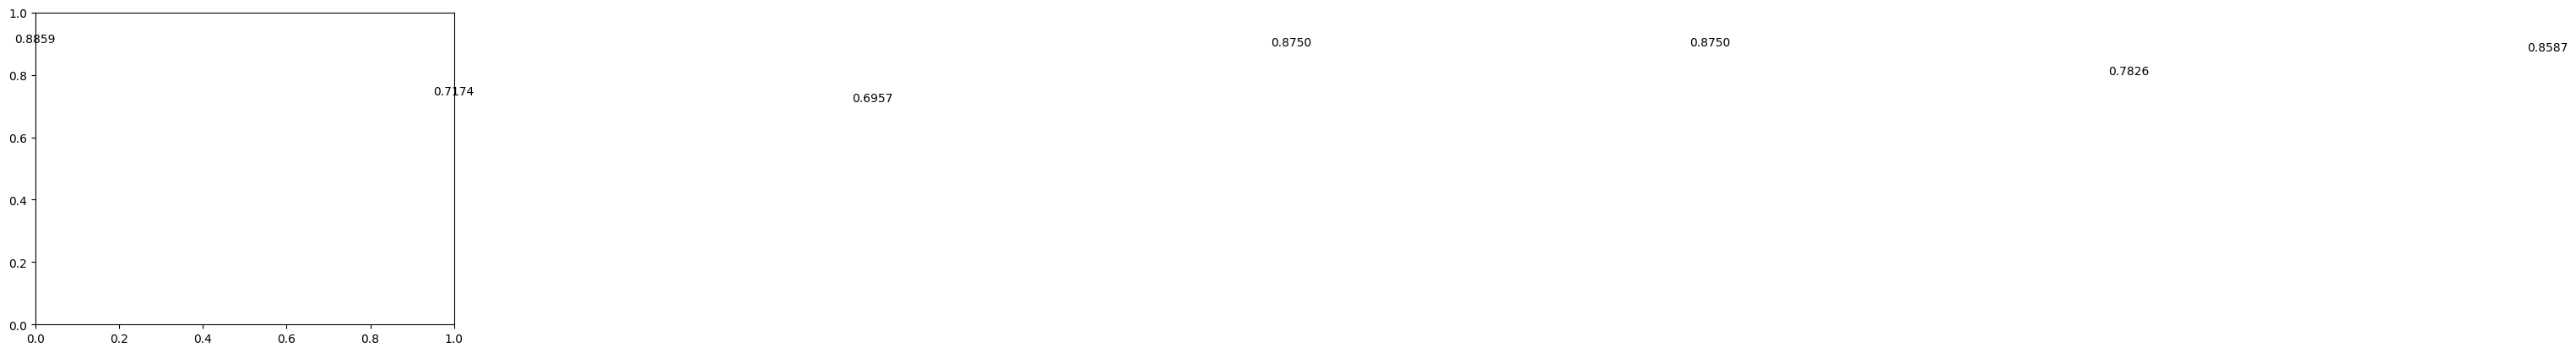

In [ ]:
# Ajout des valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{height:.4f}',
             ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()

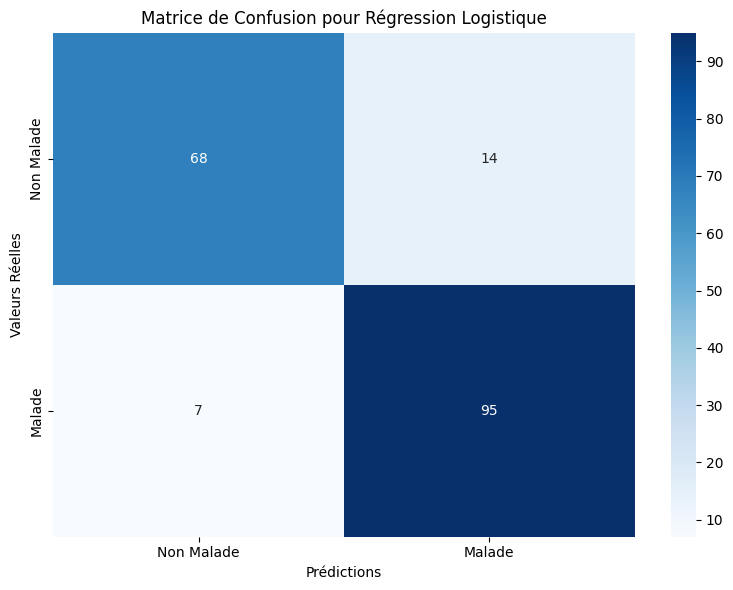

In [ ]:
# Visualisation des matrices de confusion pour le meilleur modèle
best_model_name = model_names[np.argmax(accuracies)]
best_model_cm = results[best_model_name]['confusion_matrix']

plt.figure(figsize=(8, 6))
sns.heatmap(best_model_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non Malade', 'Malade'],
            yticklabels=['Non Malade', 'Malade'])
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.title(f'Matrice de Confusion pour {best_model_name}')
plt.tight_layout()
plt.show()

✅ Interpretation :

Le modèle de régression logistique est globalement performant, avec :

- Une bonne capacité à détecter les malades `(rappel élevé)`,

- Un taux d’erreurs modéré, surtout du côté des faux positifs `(ce qui peut être acceptable dans certains contextes médicaux, car il vaut mieux alerter pour un faux positif que rater un malade)`.

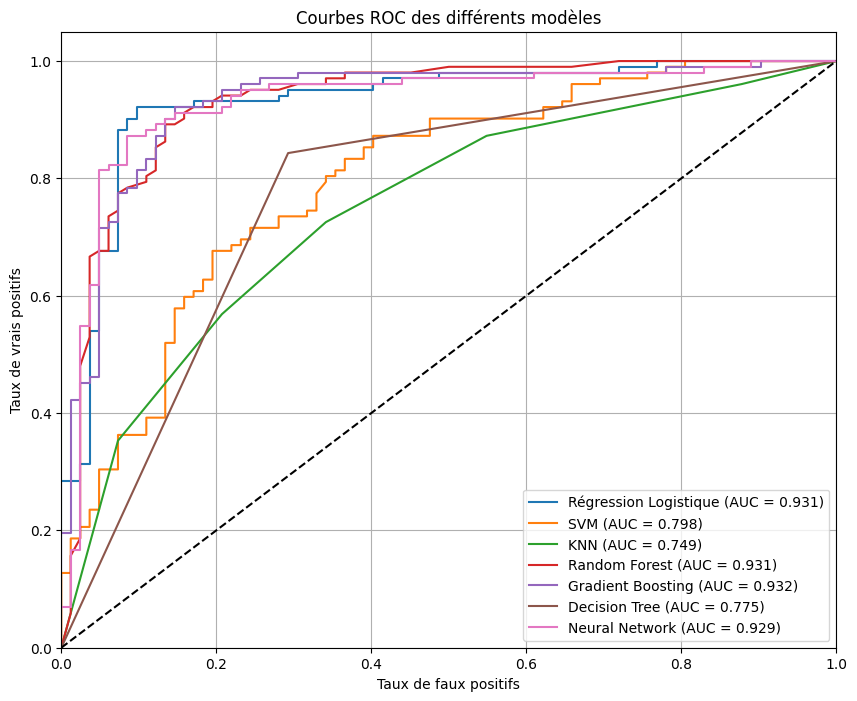

In [ ]:
# Courbe ROC pour chaque modèle
plt.figure(figsize=(10, 8))
from sklearn.metrics import roc_curve, auc

for name, result in results.items():
    model = result['model']
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC des différents modèles')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

##📈 **Ce que montre le graphique :**
Axe X (horizontal) : `taux de faux positifs (FPR)`
`→ Plus il est bas, mieux c’est`.

Axe Y (vertical) : `taux de vrais positifs (TPR)`
`→ Plus il est élevé, mieux c’est`.

Chaque courbe colorée correspond à un modèle de machine learning.

La courbe en pointillés `(la diagonale) représente le hasard` `(aucun pouvoir de prédiction)`.

##✅ **Conclusions :**
### Les meilleurs modèles sont :
`
Gradient Boosting `(0.932)`

Régression Logistique `(0.931)`

Random Forest `(0.931)`

Réseau de neurones `(0.929)`

### Les moins performants :

KNN `(0.749)`

Arbre de décision `(0.775)`

La courbe la plus proche du coin supérieur gauche correspond aux modèles les plus efficaces `(car ils ont un FPR faible et un TPR élevé)`.



## **2. Performances et Limites :**



* Performances:
Les performances des modèles peuvent être analysées selon plusieurs métriques :

`Précision (Accuracy)` : Proportion de prédictions correctes.
`Sensibilité (Recall)` : Capacité à identifier correctement les patients malades.
`Spécificité` : Capacité à identifier correctement les patients sains.
`F1-Score` : Moyenne harmonique entre précision et recall.


* Limites potentielles :

1. Surapprentissage : Les modèles complexes peuvent apprendre le bruit dans les données d'entraînement.

In [ ]:
# Évaluation du surapprentissage
for name, model in results.items():
    # Prédictions sur l'ensemble d'entraînement
    y_train_pred = model['model'].predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Prédictions sur l'ensemble de test
    test_accuracy = model['accuracy']

    # Différence entre les précisions
    diff = train_accuracy - test_accuracy

    print(f"Modèle: {name}")
    print(f"Précision sur l'ensemble d'entraînement: {train_accuracy:.4f}")
    print(f"Précision sur l'ensemble de test: {test_accuracy:.4f}")
    print(f"Différence: {diff:.4f}")
    print("-" * 50)

Modèle: Régression Logistique
Précision sur l'ensemble d'entraînement: 0.8624
Précision sur l'ensemble de test: 0.8859
Différence: -0.0235
--------------------------------------------------
Modèle: SVM
Précision sur l'ensemble d'entraînement: 0.7207
Précision sur l'ensemble de test: 0.7174
Différence: 0.0033
--------------------------------------------------
Modèle: KNN
Précision sur l'ensemble d'entraînement: 0.7807
Précision sur l'ensemble de test: 0.6957
Différence: 0.0850
--------------------------------------------------
Modèle: Random Forest
Précision sur l'ensemble d'entraînement: 1.0000
Précision sur l'ensemble de test: 0.8750
Différence: 0.1250
--------------------------------------------------
Modèle: Gradient Boosting
Précision sur l'ensemble d'entraînement: 0.9510
Précision sur l'ensemble de test: 0.8750
Différence: 0.0760
--------------------------------------------------
Modèle: Decision Tree
Précision sur l'ensemble d'entraînement: 1.0000
Précision sur l'ensemble de test

2. Déséquilibre des classes : Si une classe est surreprésentée, les modèles peuvent être biaisés.

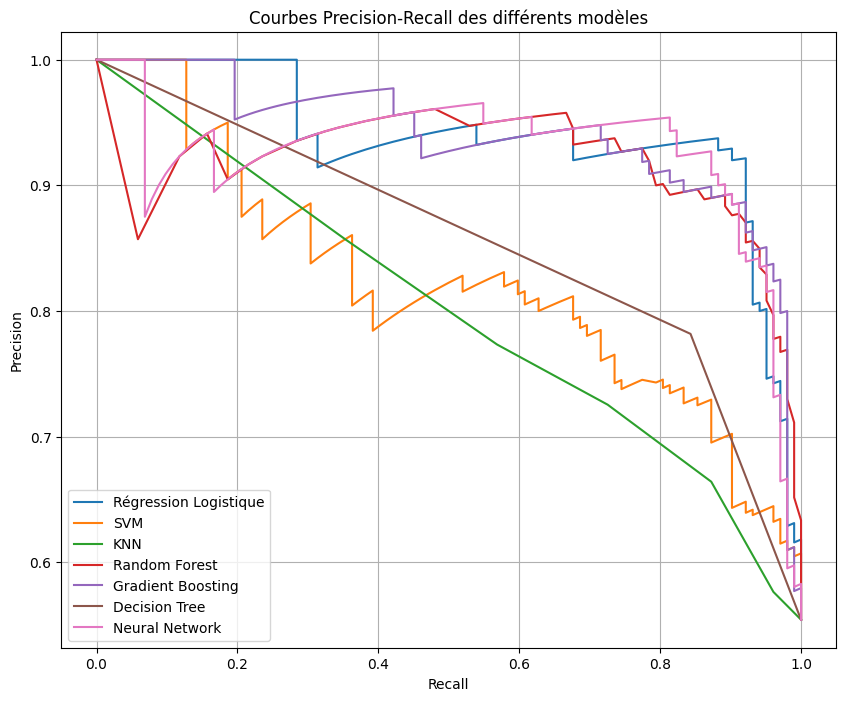

In [ ]:
from sklearn.metrics import precision_recall_curve

# Courbe Precision-Recall pour chaque modèle
plt.figure(figsize=(10, 8))

for name, result in results.items():
    model = result['model']
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_prob)
        plt.plot(recall, precision, label=f'{name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Courbes Precision-Recall des différents modèles')
plt.legend(loc="best")
plt.grid(True)
plt.show()

##✅ Interprétation:
- `Gradient Boosting, Random Forest, Neural Network et Régression Logistique` `présentent des courbes nettement supérieures`, `indiquant une bonne capacité de généralisation`. Ils maintiennent une précision élevée sur une large gamme de valeurs de rappel, ce qui signifie `qu’ils peuvent détecter un grand nombre de cas positifs sans compromettre la fiabilité des prédictions`.

- Le Gradient Boosting notamment semble offrir `le meilleur compromis global entre précision et rappel`, `avec une courbe qui reste haute et stable`. Cela montre une bonne capacité à faire `des discriminations fines entre les classes même dans des situations ambiguës`.

- À l’inverse, `KNN, SVM et Decision Tree affichent des performances` `plus modestes`. Leur précision chute rapidement dès que le `rappel augmente`. Cela suggère qu’ils ont tendance à produire beaucoup de `faux positifs lorsqu’on augmente leur sensibilité (rappel)`, ce qui est problématique pour les systèmes à haut risque.

## **3. Etudes statistiques des résultats :**
Pour une analyse statistique plus approfondie, nous pouvons utiliser la validation croisée pour obtenir des intervalles de confiance sur nos estimations de performance.

Modèle: Régression Logistique
Score moyen: 0.8333 ± 0.0380
Intervalle de confiance à 95%: [0.8000, 0.8666]
--------------------------------------------------
Modèle: SVM
Score moyen: 0.6862 ± 0.0668
Intervalle de confiance à 95%: [0.6277, 0.7448]
--------------------------------------------------
Modèle: KNN
Score moyen: 0.6622 ± 0.0536
Intervalle de confiance à 95%: [0.6153, 0.7092]
--------------------------------------------------
Modèle: Random Forest
Score moyen: 0.8169 ± 0.0395
Intervalle de confiance à 95%: [0.7823, 0.8515]
--------------------------------------------------
Modèle: Gradient Boosting
Score moyen: 0.8213 ± 0.0499
Intervalle de confiance à 95%: [0.7775, 0.8650]
--------------------------------------------------
Modèle: Decision Tree
Score moyen: 0.7330 ± 0.0419
Intervalle de confiance à 95%: [0.6963, 0.7698]
--------------------------------------------------
Modèle: Neural Network
Score moyen: 0.8191 ± 0.0415
Intervalle de confiance à 95%: [0.7827, 0.8555]
--------

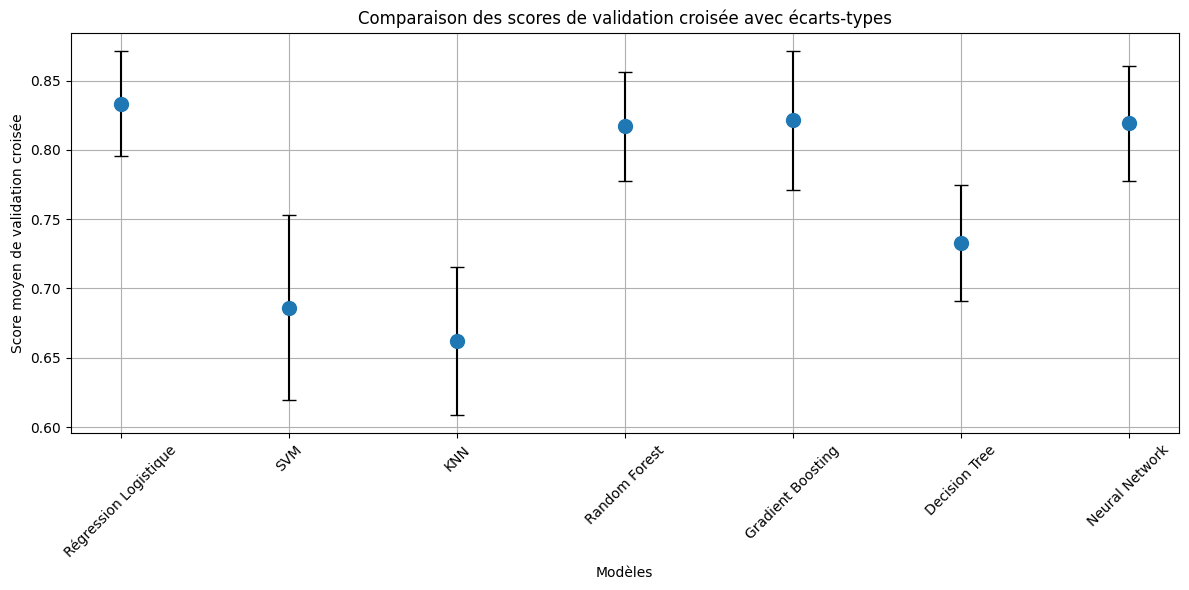

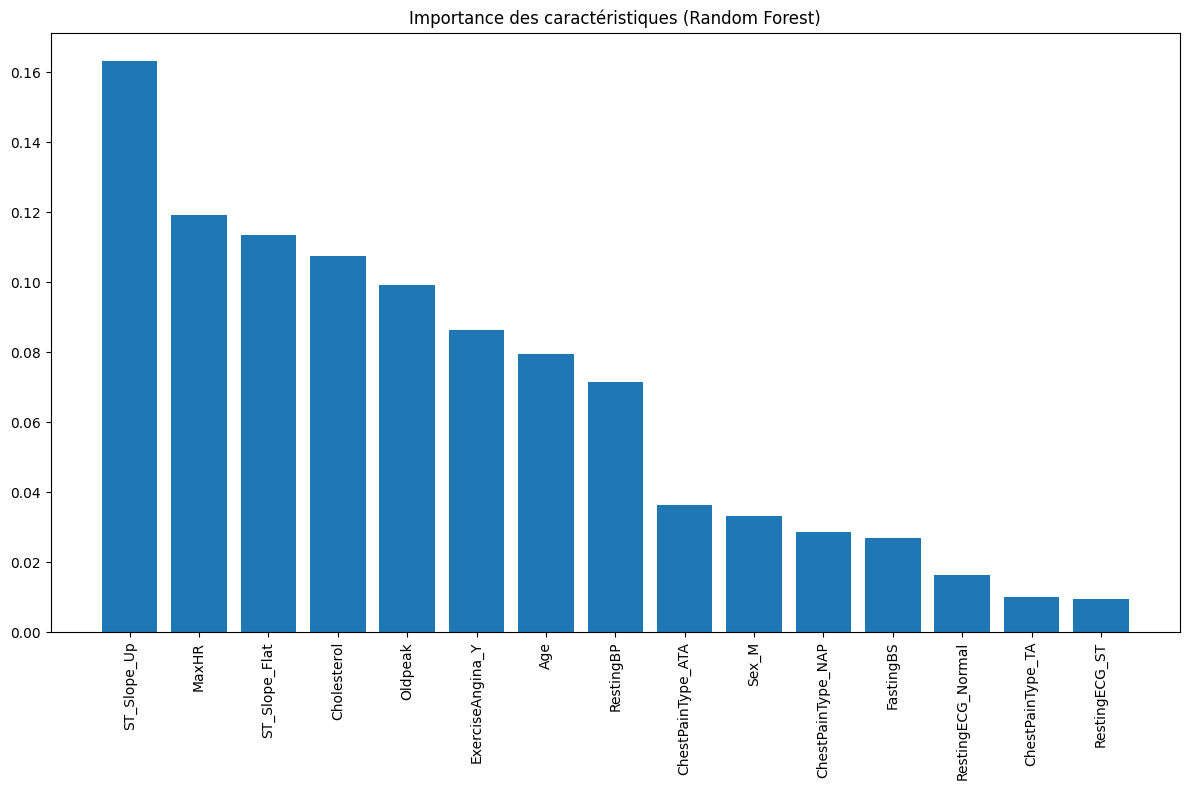

In [ ]:
# Validation croisée pour chaque modèle
cv_results = {}
for name, model in results.items():
    # Scores de validation croisée
    cv_scores = cross_val_score(model['model'], X, y, cv=5, scoring='accuracy')

    # Calcul de l'intervalle de confiance à 95%
    mean_score = cv_scores.mean()
    std_score = cv_scores.std()
    confidence_interval = stats.norm.interval(0.95, loc=mean_score, scale=std_score/np.sqrt(len(cv_scores)))

    cv_results[name] = {
        'mean_score': mean_score,
        'std_score': std_score,
        'confidence_interval': confidence_interval
    }

    print(f"Modèle: {name}")
    print(f"Score moyen: {mean_score:.4f} ± {std_score:.4f}")
    print(f"Intervalle de confiance à 95%: [{confidence_interval[0]:.4f}, {confidence_interval[1]:.4f}]")
    print("-" * 50)

# Visualisation des scores de validation croisée
plt.figure(figsize=(12, 6))
model_names = list(cv_results.keys())
mean_scores = [cv_results[name]['mean_score'] for name in model_names]
std_scores = [cv_results[name]['std_score'] for name in model_names]

plt.errorbar(model_names, mean_scores, yerr=std_scores, fmt='o', capsize=5, ecolor='black', ms=10)
plt.xlabel('Modèles')
plt.ylabel('Score moyen de validation croisée')
plt.title('Comparaison des scores de validation croisée avec écarts-types')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Analyse des caractéristiques les plus importantes (pour les modèles qui le permettent)
if 'Random Forest' in results:
    feature_importances = results['Random Forest']['model'].feature_importances_
    features = X.columns

    # Tri des caractéristiques par importance
    indices = np.argsort(feature_importances)[::-1]

    plt.figure(figsize=(12, 8))
    plt.title('Importance des caractéristiques (Random Forest)')
    plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
    plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

## **Conclusion**
  - Gradient Boosting, Régression Logistique, Neural Network et Random Forest sont les modèles les plus performants ET les plus stables.
  - SVM et KNN sont moins performants et instables, donc à éviter pour ce projet.
  - Decision Tree seul est correct mais en dessous de ses versions ensemble (RF et GB).

### Pour finaliser le projet, nous avons créer une fonction qui permet de prédire le risque de maladie cardiaque pour un nouveau patient :

>

>





In [ ]:
def predict_heart_disease(patient_data, model, encoder=None):
    """
    Prédit le risque de maladie cardiaque pour un nouveau patient.

    Args:
        patient_data (dict): Données du patient sous forme de dictionnaire
        model: Modèle entraîné
        encoder: Encodeur utilisé pour transformer les variables catégorielles

    Returns:
        tuple: (prédiction, probabilité)
    """
    # Conversion des données en DataFrame
    patient_df = pd.DataFrame([patient_data])

    # Séparation des variables numériques et catégorielles
    categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
    numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

    # Prétraitement (encodage des variables catégorielles)
    if encoder is None:
        # Si pas d'encodeur fourni, créer un nouvel encodeur et l'entraîner sur les données
        encoder = OneHotEncoder(drop='first', sparse_output=False)
        encoder.fit(patient_df[categorical_features])

    # Transformation des variables catégorielles
    encoded_features = encoder.transform(patient_df[categorical_features])
    encoded_df = pd.DataFrame(
        encoded_features,
        columns=encoder.get_feature_names_out(categorical_features)
    )

    # Combinaison des variables numériques et encodées
    X_patient = pd.concat([patient_df[numerical_features].reset_index(drop=True),
                          encoded_df.reset_index(drop=True)], axis=1)

    # Vérification que les colonnes correspondent à celles utilisées lors de l'entraînement
    expected_columns = X_train.columns.tolist()
    actual_columns = X_patient.columns.tolist()

    if set(expected_columns) != set(actual_columns):
        print("Attention : les colonnes ne correspondent pas !")
        print(f"Colonnes attendues : {expected_columns}")
        print(f"Colonnes actuelles : {actual_columns}")

        # Réorganiser les colonnes pour correspondre à l'ordre d'entraînement
        X_patient = X_patient.reindex(columns=expected_columns, fill_value=0)

    # Prédiction
    prediction = model.predict(X_patient)[0]
    probability = model.predict_proba(X_patient)[0][1]

    return prediction, probability

# Exemple d'utilisation
best_model = results[best_model_name]['model']

# Important: utiliser le même encodeur que celui utilisé pour l'entraînement
encoder_for_prediction = encoder  # Récupérer l'encodeur utilisé précédemment

new_patient = {
    'Age': 65,
    'Sex': 'M',
    'ChestPainType': 'ATA',
    'RestingBP': 140,
    'Cholesterol': 220,
    'FastingBS': 0,
    'RestingECG': 'Normal',
    'MaxHR': 150,
    'ExerciseAngina': 'N',
    'Oldpeak': 1.2,
    'ST_Slope': 'Flat'
}

prediction, probability = predict_heart_disease(new_patient, best_model, encoder_for_prediction)
print(f"Prédiction: {'Maladie cardiaque' if prediction == 1 else 'Pas de maladie cardiaque'}")
print(f"Probabilité de maladie cardiaque: {probability:.2f}")

Prédiction: Maladie cardiaque
Probabilité de maladie cardiaque: 0.55


# **Utilisation de la bibliothéque ipywidgets pour les tests:**

In [ ]:
!pip install ipywidgets --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.5 MB/s eta 0:00:00


In [ ]:
# Widgets numériques
age = widgets.IntSlider(value=50, min=20, max=100, description='Âge:')
resting_bp = widgets.IntSlider(value=120, min=80, max=200, description='Resting BP:')
cholesterol = widgets.IntSlider(value=200, min=100, max=400, description='Cholestérol:')
fasting_bs = widgets.Dropdown(options=[0, 1], description='FastingBS:')
max_hr = widgets.IntSlider(value=150, min=60, max=220, description='MaxHR:')
oldpeak = widgets.FloatSlider(value=1.0, min=0.0, max=6.0, step=0.1, description='Oldpeak:')

# Widgets catégoriels
sex = widgets.Dropdown(options=['M', 'F'], description='Sexe:')
chest_pain = widgets.Dropdown(options=['TA', 'ATA', 'NAP', 'ASY'], description='Douleur:')
resting_ecg = widgets.Dropdown(options=['Normal', 'ST', 'LVH'], description='ECG repos:')
exercise_angina = widgets.Dropdown(options=['Y', 'N'], description='Angine effort:')
st_slope = widgets.Dropdown(options=['Up', 'Flat', 'Down'], description='ST Slope:')


In [ ]:
predict_button = widgets.Button(description="Prédire", button_style='success')
output = widgets.Output()

def on_predict_clicked(b):
    with output:
        clear_output()
        patient_data = {
            'Age': age.value,
            'Sex': sex.value,
            'ChestPainType': chest_pain.value,
            'RestingBP': resting_bp.value,
            'Cholesterol': cholesterol.value,
            'FastingBS': fasting_bs.value,
            'RestingECG': resting_ecg.value,
            'MaxHR': max_hr.value,
            'ExerciseAngina': exercise_angina.value,
            'Oldpeak': oldpeak.value,
            'ST_Slope': st_slope.value
        }

        prediction, probability = predict_heart_disease(patient_data, best_model, encoder_for_prediction)
        print(f"👉 Prédiction: {'⚠️ Maladie cardiaque' if prediction == 1 else '✅ Pas de maladie cardiaque'}")
        print(f"🔍 Probabilité: {probability:.2%}")

predict_button.on_click(on_predict_clicked)


In [ ]:
form = widgets.VBox([
    age, sex, chest_pain, resting_bp, cholesterol, fasting_bs,
    resting_ecg, max_hr, exercise_angina, oldpeak, st_slope,
    predict_button, output
])
display(form)
